In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
reviews = pd.read_csv(r'D:\Crawler\51job\营销-1-clean-只看月薪.csv', encoding='gb18030')

In [3]:
print(reviews.shape)
reviews.head()

(410, 15)


,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型,地区,*n薪,薪酬_n,月薪最小值,月薪最大值
0,营销高储（未来总裁）,深圳市乐有家控股集团有限公司,7.5千-1.5万,东莞-常平镇,本科,1年经验,营销,房地产,岗位职责“未来总裁”人才工程是乐有家控股集团为推动公司做大做强粤港澳大湾区及“百城万店”全国...,民营 | 10000人以上,东莞,NaN,7500-15000,7500.0,15000.0
1,营销管理岗,久隆财产保险有限公司,8千-1.5万,珠海-香洲区,本科,3-4年经验,营销,保险,营销管理岗主要职责：一、负责对分解的渠道任务目标推动执行；二、拟定渠道销售策略并推动落实；三...,民营 | 少于50人,珠海,NaN,8000-15000,8000.0,15000.0
2,营销负责人,河南天伦地产集团有限公司,1.5-2.3万,郑州-金水区,本科,5-7年经验,五险一金,房地产,一、岗位职责：1.负责整体营销工作，完成销售任务，控制营销费用，对销售目标负责；2.分解年度...,民营 | 1000-5000人,郑州,NaN,15000-23000,15000.0,23000.0
3,新营销储干+底薪7200元+免费培训,深圳市乐有家控股集团有限公司,5-9千,广州-番禺区,大专,1年经验,总裁,房地产,职位信息①乐有家大学生团队，无限机遇等你来挑战！【新营销：行业清流，坚持“八不三真”】“八不...,民营 | 10000人以上,广州,NaN,5000-9000,5000.0,9000.0
4,房地产营销经理,深圳市岗宏集团有限公司,1-2万,深圳-龙岗区,本科,5-7年经验,五险一金,房地产,职责描述：1、负责深圳项目营销管理工作，统筹管理项目销售及策划团队，对项目任务及营销目标负责...,民营 | 150-500人,深圳,NaN,10000-20000,10000.0,20000.0


In [4]:
content = reviews['职位描述或任职要求']

In [5]:
content

0      岗位职责“未来总裁”人才工程是乐有家控股集团为推动公司做大做强粤港澳大湾区及“百城万店”全国...
1      营销管理岗主要职责：一、负责对分解的渠道任务目标推动执行；二、拟定渠道销售策略并推动落实；三...
2      一、岗位职责：1.负责整体营销工作，完成销售任务，控制营销费用，对销售目标负责；2.分解年度...
3      职位信息①乐有家大学生团队，无限机遇等你来挑战！【新营销：行业清流，坚持“八不三真”】“八不...
4      职责描述：1、负责深圳项目营销管理工作，统筹管理项目销售及策划团队，对项目任务及营销目标负责...
                             ...                        
405    主要职责：1、负责区域年度销售规划，目标分解，落实、确保目标实现；2、负责渠道拓展及维护工作...
406    岗位职责1、参与商业活动方案的策划创意，负责活动的前期准备，包括物料采购，活动布置等2、负责...
407    岗位职责：1、负责为品牌定制在新媒体平台的内容策略，达成品牌、产品的推广目标；2、输出完整的...
408    主要职责：1、负责区域年度销售规划，目标分解，落实、确保目标实现；2、负责渠道拓展及维护工作...
409    岗位职责：1.与项目对接，协助项目完成营销推广策划方案2.负责百度，微信等数字化媒体和常规媒...
Name: 职位描述或任职要求, Length: 410, dtype: object

In [6]:
strinfo = re.compile('[0-9a-zA-Z]|职位描述|岗位职责|任职要求|职位描述及要求|工作职责|岗位要求|精通|熟悉|负责|开发|工作|节假日|经验|相关|能力|福利|公司|优先')
content = content.apply(lambda x: strinfo.sub('',x))

In [7]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.159 seconds.
Prefix dict has been built successfully.


In [8]:
seg_word.head()

0    [(“, x), (未来, t), (总裁, n), (”, x), (人才, n), (工...
1    [(营销, vn), (管理, vn), (岗, n), (主要职责, l), (：, x)...
2    [(一, m), (、, x), (：, x), (., x), (整体, n), (营销,...
3    [(职位, n), (信息, n), (①, x), (乐, a), (有, v), (家,...
4    [(职责, n), (描述, v), (：, x), (、, x), (深圳, ns), (...
Name: 职位描述或任职要求, dtype: object

In [9]:
type(seg_word)
type(list(seg_word))

list

In [10]:
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(list(n_content), [])
# seg_word = list(seg_word)

In [11]:
seg_word = sum(seg_word, [])
# 词性
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

# content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]
# # 评论类型
# content_type = sum(content_type, [])

result = pd.DataFrame({"index_content":index_content,
                       "word":word,
                       "nature":nature,
                       # "content_type":content_type
                       })

In [12]:
# 删除标点符号
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词
stop_path = open(r"D:\DL_Homework\NLP\Data\电商产品评论数据情感分析\stoplist.txt",encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

In [13]:
result.head()

,index_content,word,nature
1,1,未来,t
2,1,总裁,n
4,1,人才,n
5,1,工程,n
7,1,乐,a


In [14]:
# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
# 词语在该评论的位置
index_word = sum(index_word, [])
# 合并评论id
result['index_word'] = index_word

result.head()

,index_content,word,nature,index_word
1,1,未来,t,0
2,1,总裁,n,1
4,1,人才,n,2
5,1,工程,n,3
7,1,乐,a,4


In [15]:
# # 提取含有名词类的评论,即词性含有“n”的评论
# ind_n = result[['n' in x for x in result['nature']]]['index_content'].unique()
# result_n = result[[x in ind_n for x in result['index_content']]]
# result_n.head()

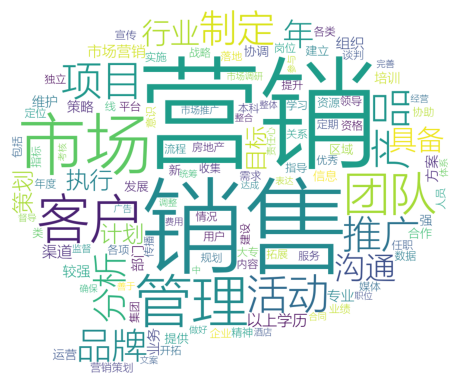

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby('word')['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\pl.jpg')

# 自己上传中文字体到kesci
font_path = 'D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\MSYHL.TTC'
wordcloud = WordCloud(font_path=font_path, # 设置字体，不设置就会出现乱码
                      max_words=120,
                      background_color='white',
                      mask=backgroud_Image)# 词云形状

my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()